**2. 서포트 벡터가 무엇인가요?**

**답** : 서포트벡터는 svm이 훈련된 후에 경게를 포함해 도로에 놓인 어떤 샘플을 의미함
결정 경계는 전적으로 서포트벡터에 의해 결정되며 서포트 벡터가 아닌 어떤 샘플도 영향을 주지 못함
이런 샘플은 삭제하고 다른 샘플을 추가하거나 다른 곳으로 이동시킬 수 있음
샘플이 도로 밖에 있는 한 결정경계에 영향을 주지 못함
예측을 계산할 때에는 전체 훈련 세트가 아니라 서포트 벡터만 관여됨

**3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?**

**답** : svm은 클래스 사에에 가능한 한 가장 큰 도로를 내는 것임
훈련세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향이 있음

**8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.**

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# iris data를 로드하고 x,y를 지정해줍니다.
#(힌트: 핸즈온 머신러닝 교재 208쪽 참고)

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
C = 5 
alpha = 1 / (C * len(X))

In [5]:
# LinearSVC 학습하기

lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=100000, random_state=42)

# 위를 이용하여 데이터 스케일링 후 LinearSVC,SVC,SGDClassifier 구하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)






LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


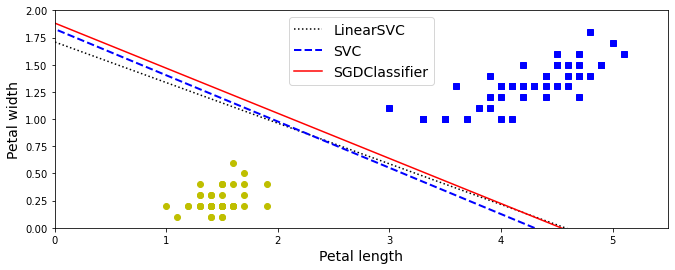

In [6]:
# 세 개 모델의 결정 경계를 그리기
# 먼저 결정 결제들의 기울기(W)와 편향(b)을 구함

w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]


# 결정 결계를 원본 스케일로 변환하기
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계를 모두 그리기

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()



# 아주 비슷한 결정 경계를 보인다. 